## Part-1

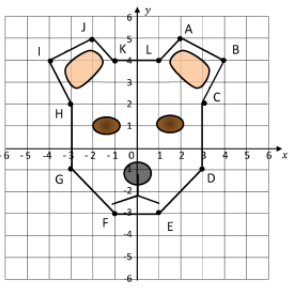

You will be applying a transformation on a set of points of the following image (50%).
<br>
a) Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates. Perform a rotation of 20 degrees on the points and plot them. <br>
b) Find the matrix  that represents a translation of 2 in x direction, 1 in y direction degrees in homogeneous coordinates. Perform a translation in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
c) Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on (b) and verify with a plot the match.<br>
d) Define a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and plot.<br>
e) Are the matrices obtained in (c) and (d) the same? Why?<br>

In [ ]:
def cvt_homogeneousCoord(arr):
  temp_arr = []
  for x in arr:
    vector = np.ones(3)
    vector[0] = x[0]
    vector[1] = x[1]
    temp_arr.append(vector)
  return temp_arr


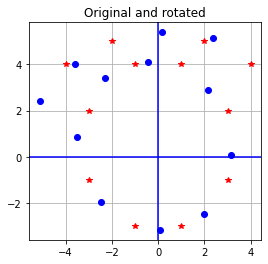

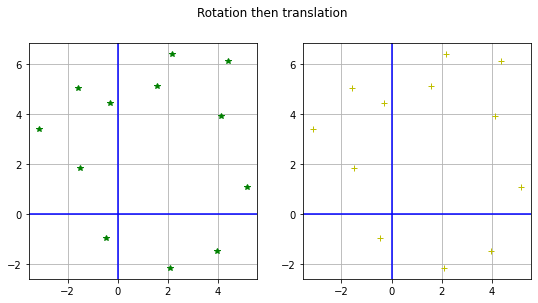

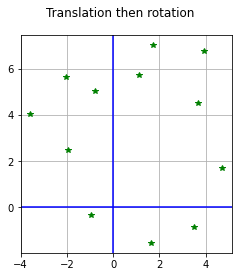

In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# define your points
points = np.array([[2,5],[4,4],[3,2],[3,-1],[1,-3],[-1,-3],[-3,-1],[-3,2],[-4,4],[-2,5],[-1,4],[1,4]])

# represent your points in homogeneous coordinates (3 coordinates).
homogeneous_coord = np.array(cvt_homogeneousCoord(points))

# make the points be in columns (you need to transpose them)
T_homogeneous_coord = np.transpose(homogeneous_coord)

# define your rotation matrix here:
cosine = 0.93969262078
sine = 0.34202014332
R= np.array([[cosine, -sine, 0],
             [sine, cosine, 0],
             [0,0,1]])

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(T_homogeneous_coord[0,:],T_homogeneous_coord[1,:],'r*')

# do the rotation
# you can use np.matmul

rotPoints = np.matmul(R, T_homogeneous_coord)

plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()

# define your translation matrix here:
tx= 2
ty= 1
T= np.array([[1, 0, tx],
             [0, 1, ty],
             [0, 0, 1]])

# translation + rotation
fig, ax = plt.subplots(ncols=2, figsize=(9, 4.5))
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
#np.matmul
tRotPoints = np.matmul(T, rotPoints)

ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# Compute a single matrix for your rotation and translation
tR = np.matmul(T, R)

# Transform your points with a single matrix
tRotPoints2 = np.matmul(tR, T_homogeneous_coord)
#plot points
ax[1].plot(tRotPoints2[0,:],tRotPoints2[1,:],'y+')
plt.show()

#Also compute rotation followed by translation, and plot, and comment (d and e)

# define your translation matrix here:
tx= 2
ty= 1
T2= np.array([[1, 0, tx],
             [0, 1, ty],
             [0, 0, 1]])

# rotation + translation
fig, ax = plt.subplots(1)
fig.suptitle('Translation then rotation')

ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis
# Compute rotation over translated points
#np.matmul
Tpoints = np.matmul(T2, T_homogeneous_coord)
rotTPoints = np.matmul(R, Tpoints)

ax.plot(rotTPoints[0,:],rotTPoints[1,:],'g*')

Are the matrices obtained in (c) and (d) the same? Why?

They are not. In the picture below we obviously see that rotation followed by translation and translation followed by rotation is different. The reason behind this ω, rotational angle, scanned the angle in same reference points but translate points depends on their last location's.

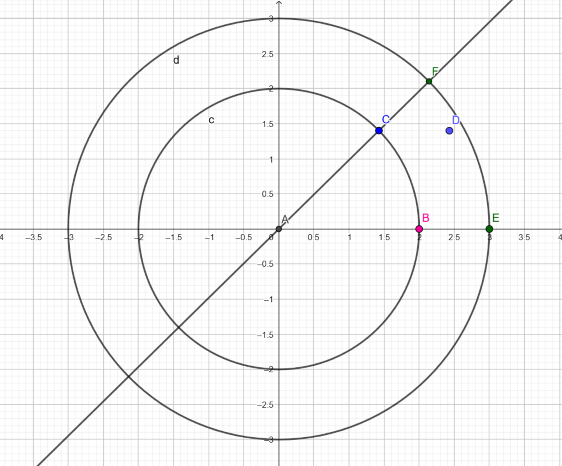

## Part-2

Now you will be doing warping with forward mapping for an image and will be implementing a nearest neighbor interpolation (50%).

a) Use the following homography matrix for forward warping of the grid points:  <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
   [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
   [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br>
b) Visualize the obtained warped image in the range from 0 to 1000 in x and y. Comment about the appearance of the image. Does the image have gaps?<br>
c) Implement a forward nearest neighbor interpolation in the warped image. Visualize the interpolated image. Comment about the appereance of the interpolated image versus the initially warped image in (b).

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray

# load an image to warp
img = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/img2warp.jpg")

In [ ]:
# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# number of points on the grid
numpoints = xv.ravel().shape[0]
# Note: ravel() returns contiguous flattened array (1D array with all the
# input-array elements and with the same type as it).

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H,grid)

# Convert from homogeneous to heterogeneous coordinates
newgridHetero = np.zeros((2,numpoints))
# TO DO: complete the conversion. remember x=X/w
newgridHetero[0,:]= newgrid[0,:] / newgrid[2,:]
newgridHetero[1,:]= newgrid[1,:] / newgrid[2,:]

# Raw approximation. You can round your newgridHetero values to closest integer
newgrid2 = newgridHetero.round().astype('int64')
newgrid2

array([[1700, 1700, 1700, ..., 1090, 1090, 1090],
       [ 624,  623,  623, ...,  532,  533,  533]])

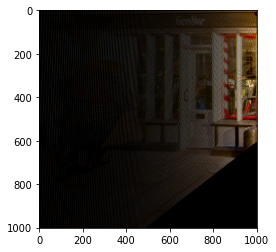

In [ ]:
# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
# TO DO: ASSIGN the remaining colors
warped[newgrid2[1,valids],newgrid2[0,valids],1]=g[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],2]=b[valids]

plt.imshow(warped)
plt.show()

b) Visualize the obtained warped image in the range from 0 to 1000 in x and y. Comment about the appearance of the image. Does the image have gaps?

Yes it does. Valids inputs are defined by points that are in the area of we interest and that is not fill the all values in the created canvas. The forward mapping iterates over each pixel of the input image, computes new coordinates for it, and copies its value to the new location. But the new coordinates may not lie within the bounds of the output image and may not be integers. We have some pixels that did not receive any input image pixels that is the gaps.

---

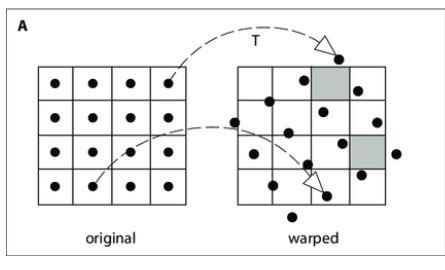


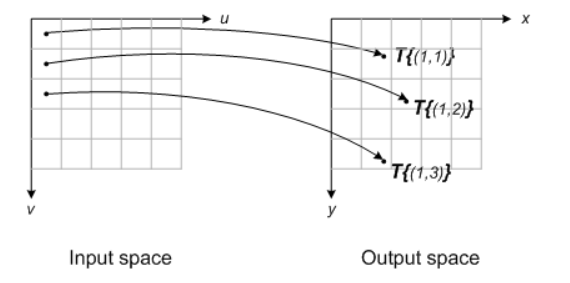


---

c) Implement a forward nearest neighbor interpolation in the warped image. Visualize the interpolated image. Comment about the appereance of the interpolated image versus the initially warped image in (b).


In the forward mapping we obviously see that there are many dark pixels which is caused by forward mapping. The reason is explained above. On the other hand, the nearest neigbor interpolation method seems more clear.



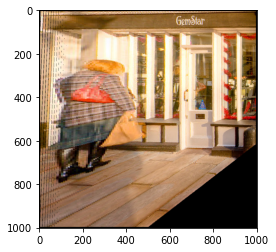

In [ ]:
# Nearest Neighbor interpolation
#(code below is not forward or backward mapping, we just make the pixels in 'warped' cover a larger area)

# You dont need to change anything in the code below

# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check

            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]


plt.imshow(warped2)
plt.show()


### References

- https://blogs.mathworks.com/steve/2006/04/28/spatial-transforms-forward-mapping/